In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
# Load Dataset
predictors = pd.read_csv('logisticX.csv')  # Independent Variables
response = pd.read_csv('logisticY.csv')  # Dependent Variable

In [7]:
# Convert to numpy arrays
X = predictors.to_numpy()
y = response.to_numpy().reshape(-1, 1)

In [9]:
# Normalize Features
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [11]:
# Add Bias Term
X = np.hstack((np.ones((X.shape[0], 1)), X))

In [13]:
# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [15]:
# Cost Function
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

In [17]:
# Gradient Descent
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []
    for _ in range(iterations):
        theta -= (alpha/m) * (X.T @ (sigmoid(X @ theta) - y))
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

In [19]:
# Train Model (Learning Rate = 0.1)
theta = np.zeros((X.shape[1], 1))
theta, cost_history_01 = gradient_descent(X, y, theta, alpha=0.1, iterations=1000)

In [21]:
print(f'Final Cost Function Value: {cost_history_01[-1]:.4f}')

Final Cost Function Value: 0.2261


In [23]:
print(f'Optimized Theta Values (After Convergence):\n{theta}')

Optimized Theta Values (After Convergence):
[[ 0.38193936]
 [ 2.35449296]
 [-2.53913828]]


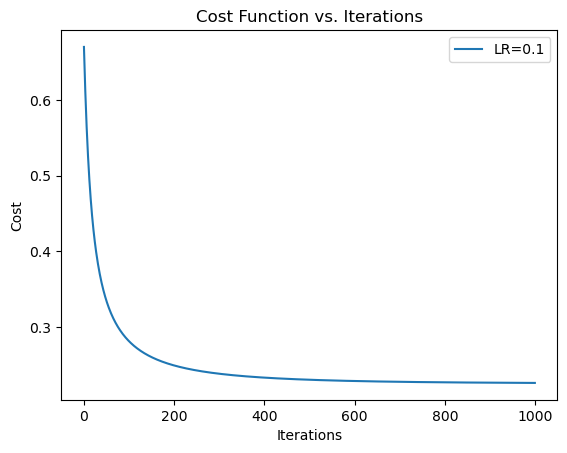

<Figure size 640x480 with 0 Axes>

In [25]:
# Plot Cost Function vs. Iterations
plt.plot(range(len(cost_history_01)), cost_history_01, label='LR=0.1')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.title('Cost Function vs. Iterations')
plt.show()
plt.savefig('cost_vs_iterations_1.png')

In [27]:
# Train Model (Learning Rate = 5)
theta_5 = np.zeros((X.shape[1], 1))
theta_5, cost_history_5 = gradient_descent(X, y, theta_5, alpha=5, iterations=100)

In [29]:
print(f'Final Cost Function Value: {cost_history_01[-1]:.4f}')

Final Cost Function Value: 0.2261


In [31]:
print(f'Optimized Theta Values (After Convergence):\n{theta}')

Optimized Theta Values (After Convergence):
[[ 0.38193936]
 [ 2.35449296]
 [-2.53913828]]


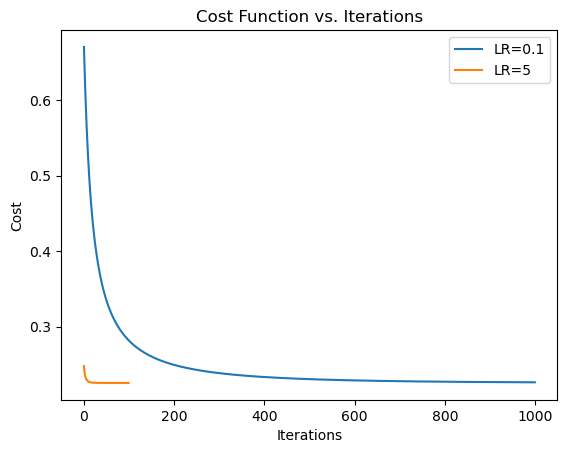

<Figure size 640x480 with 0 Axes>

In [33]:
# Plot Cost Function vs. Iterations
plt.plot(range(len(cost_history_01)), cost_history_01, label='LR=0.1')
plt.plot(range(len(cost_history_5)), cost_history_5, label='LR=5')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.title('Cost Function vs. Iterations')
plt.show()
plt.savefig('cost_vs_iterations_2.png')